# Convert Signal Multi-Axis test

In this notebook, we check whether the function of convert.py file work as expected for multi-axis data

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from caits.visualization import plot_signal, plot_spectrogram
from caits import convert as cnv
from caits.fe import spectrogram

## Step 2: Initialize dataset

In [2]:
# Parameters
sample_rate = 1000
duration = 1.0
n_fft = 200
hop_length = 100
n_channels = 2

# Generate time axis and multichannel signal: shape (samples, channels)
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ch1 = np.sin(2 * np.pi * 50 * t)                   # 5 Hz sine wave
ch2 = np.sin(2 * np.pi * 100 * t + np.pi)          # 10 Hz sine with phase shift
ch3 = np.sin(2 * np.pi * 200 * t + np.pi)          # 15 Hz sine with phase shift
data = np.stack((ch1, ch2, ch3), axis=-1)              # shape: (1000, 2)

data.shape


(1000, 3)

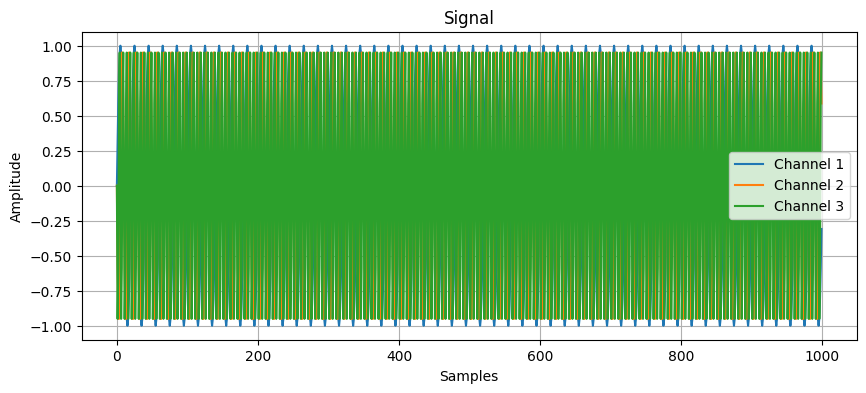

In [3]:
fig = plot_signal(data, sample_rate)

## Step 3: Create feature maps

In [4]:
specs, f = spectrogram(y=data, n_fft=n_fft, hop_length=hop_length)
specs.shape

(3, 101, 11)

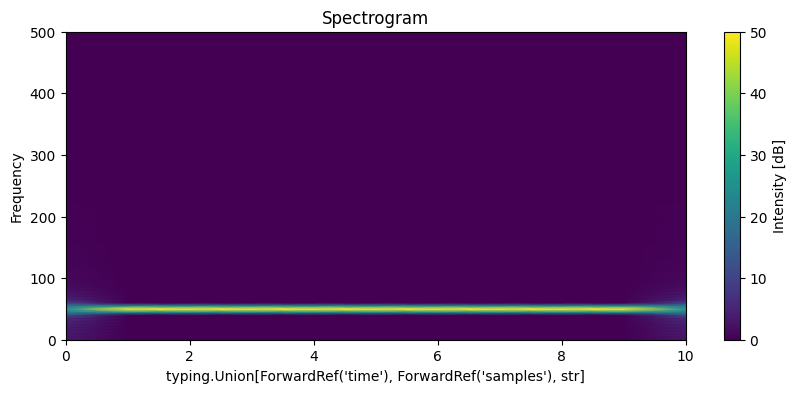

In [5]:
f = np.fft.rfftfreq(200, 1 / sample_rate)
x = np.arange(specs.shape[2])

fig = plot_spectrogram(spec=specs[0], x=x, f=f)

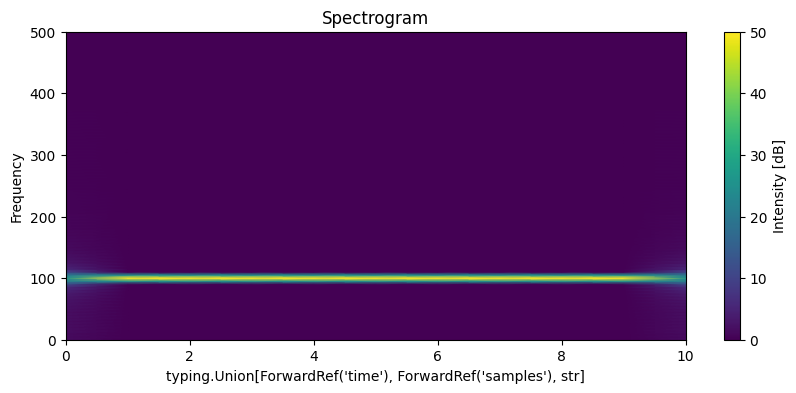

In [6]:
fig = plot_spectrogram(spec=specs[1], x=x, f=f)

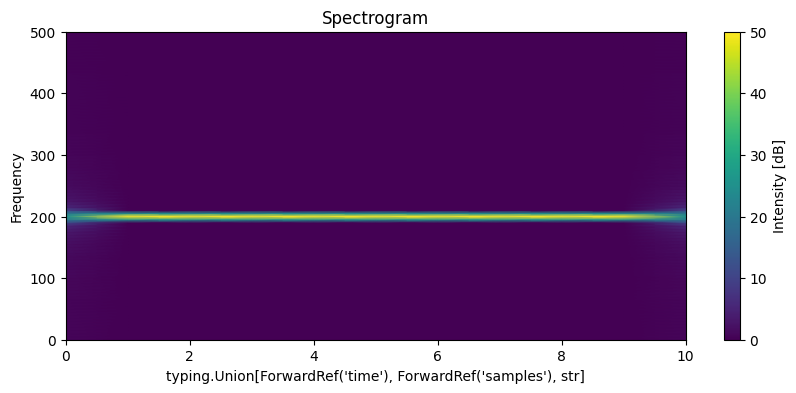

In [7]:
fig = plot_spectrogram(spec=specs[2], x=x, f=f)

## Step 4: Convert times like

In [8]:
times_sig = cnv.times_like(specs, sr=sample_rate, hop_length=hop_length, n_fft=n_fft)
times_sig, x

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

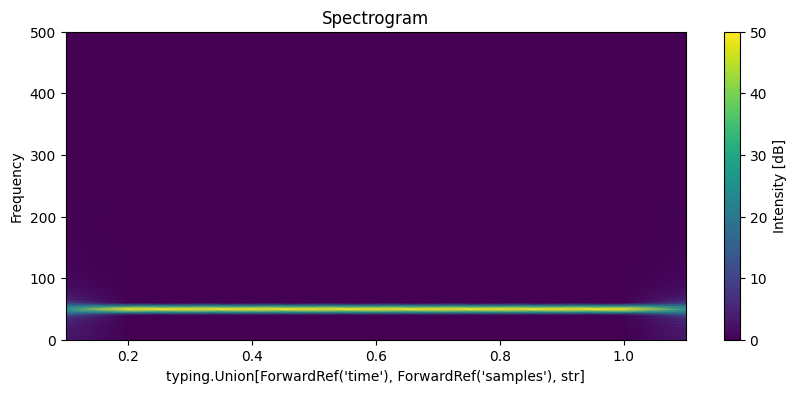

In [9]:
fig = plot_spectrogram(spec=specs[0], x=times_sig, f=f)

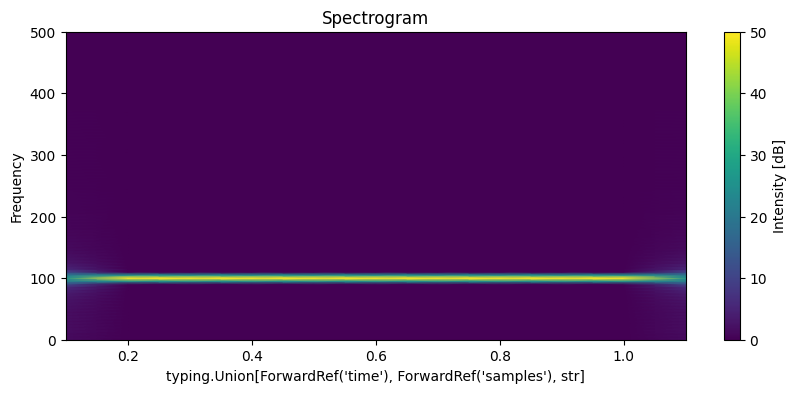

In [10]:
fig = plot_spectrogram(spec=specs[1], x=times_sig, f=f)

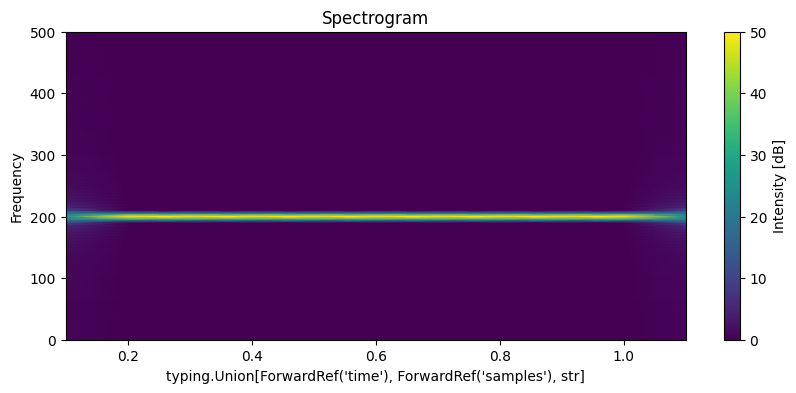

In [11]:
fig = plot_spectrogram(spec=specs[2], x=times_sig, f=f)

## Step 5: Convert samples like

In [12]:
samples_sig = cnv.samples_like(specs, hop_length=hop_length, n_fft=n_fft)
samples_sig

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100])

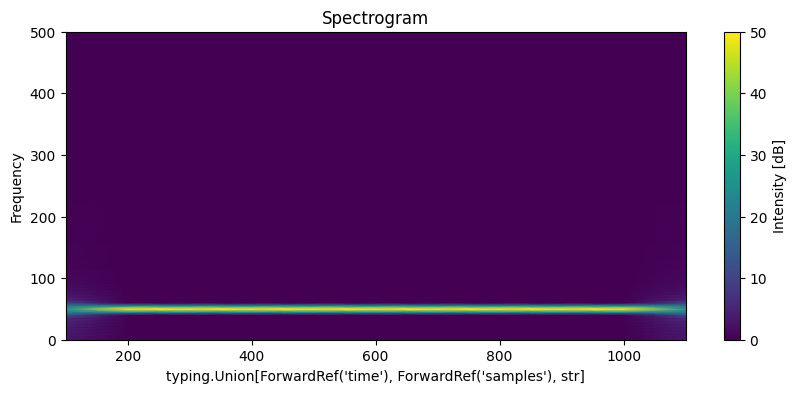

In [13]:
fig = plot_spectrogram(spec=specs[0], x=samples_sig, f=f)

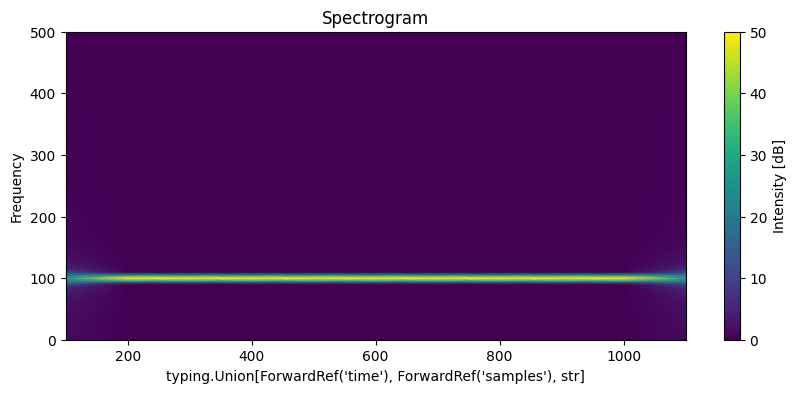

In [14]:
fig = plot_spectrogram(spec=specs[1], x=samples_sig, f=f)

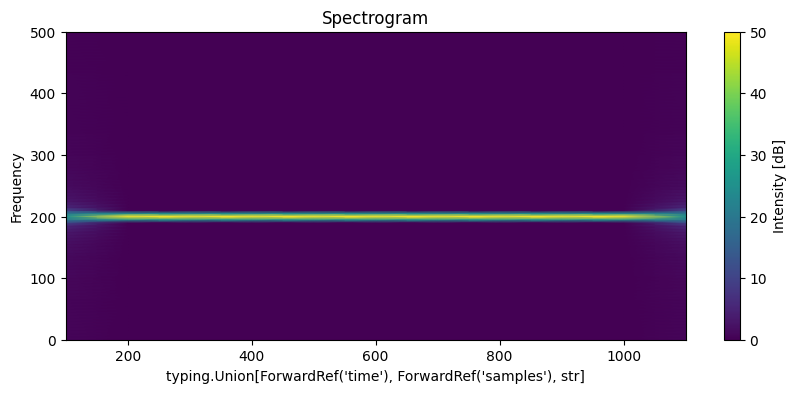

In [15]:
fig = plot_spectrogram(spec=specs[2], x=samples_sig, f=f)

# Real-world data

In [16]:
motion_df = pd.read_csv("data/scratching_eye.csv")

In [17]:
motion_df.head()

,acc_x_axis_g,acc_y_axis_g,acc_z_axis_g,gyr_x_axis_deg/s,gyr_y_axis_deg/s,gyr_z_axis_deg/s
0,1.131,0.342,-0.063,37.515,-44.408,-62.647
1,1.120,0.323,-0.241,35.563,22.143,-35.258
2,1.023,0.431,-0.146,42.212,78.263,-1.525
3,0.856,0.600,0.086,50.142,131.516,18.056
4,0.752,0.709,0.327,55.815,168.116,26.779


In [18]:
motion_channels = motion_df.columns.tolist()
motion_channels

['acc_x_axis_g',
 'acc_y_axis_g',
 'acc_z_axis_g',
 'gyr_x_axis_deg/s',
 'gyr_y_axis_deg/s',
 'gyr_z_axis_deg/s']

In [19]:
motion_acc = motion_df[["acc_x_axis_g", "acc_y_axis_g", "acc_z_axis_g"]]
motion_acc_arr = motion_acc.values

In [20]:
motion_acc_arr.shape

(1034, 3)

In [21]:
SAMPLE_RATE = 100
N_FFT = 50
HOPE_LENGTH = 25

In [22]:
specs, f = spectrogram(y=motion_acc_arr, n_fft=N_FFT, hop_length=HOPE_LENGTH)
specs.shape

(3, 26, 42)

In [23]:
times_sig = cnv.times_like(specs, sr=SAMPLE_RATE, hop_length=HOPE_LENGTH, n_fft=N_FFT)

In [25]:
f = np.fft.rfftfreq(N_FFT, 1 / sample_rate)
x = np.arange(specs.shape[2])

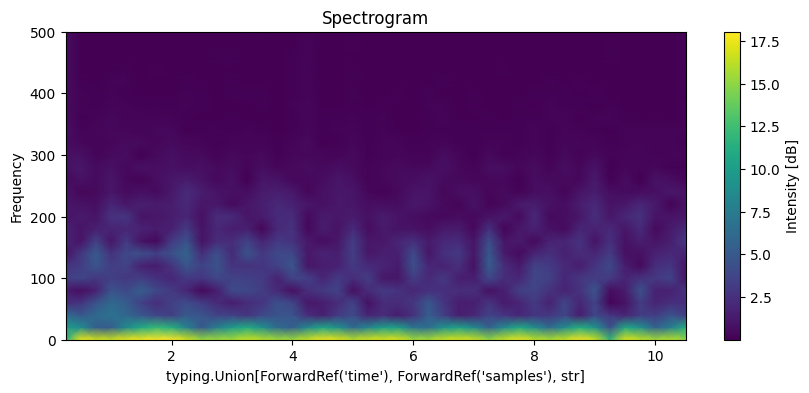

In [26]:
plot_spectrogram(
    f=f,
    x=times_sig,
    spec=specs[0],
    return_mode=False
)

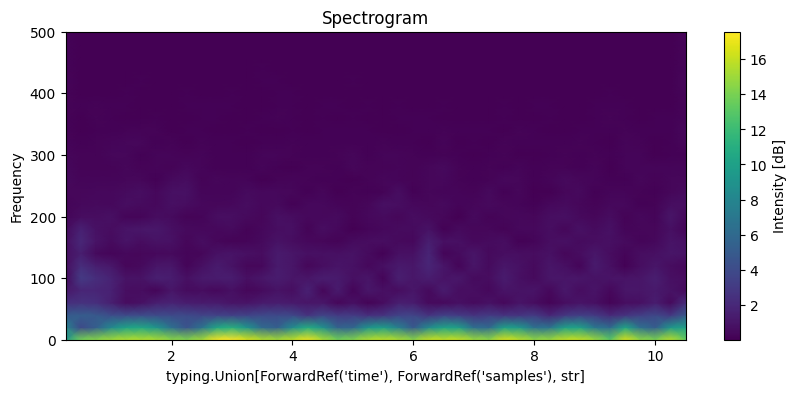

In [27]:
plot_spectrogram(
    f=f,
    x=times_sig,
    spec=specs[1],
    return_mode=False
)

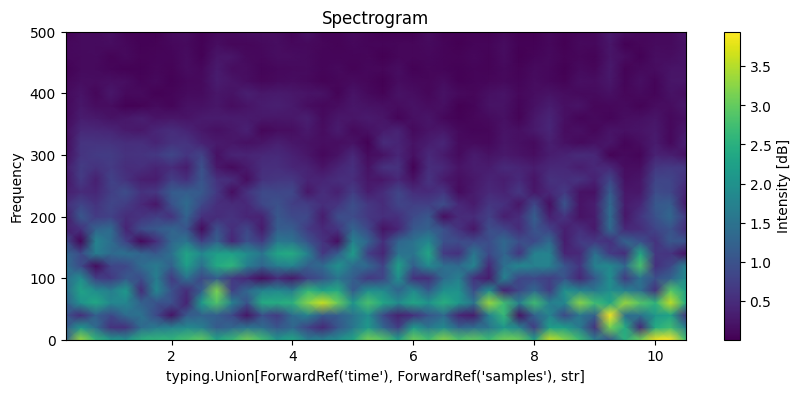

In [28]:
plot_spectrogram(
    f=f,
    x=times_sig,
    spec=specs[2],
    return_mode=False
)